In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [3]:
f=open('iPhoneSensors.csv')  
dataset=pd.read_csv(f)
dataset.head(10)

,time,roll,pitch,yaw,rotMat11,rotMat12,rotMat13,rotMat21,rotMat22,rotMat23,...,accelerometerDataY,accelerometerDataZ,gyroDataX,gyroDataY,gyroDataZ,magDataX,magDataY,magDataZ,Unnamed: 39,StepDetected
0,0.00,-1.315556,1.246050,1.016641,0.912650,-0.267870,0.308731,-0.271318,0.167902,0.947732,...,-0.931702,-0.078094,-0.041579,0.012375,-0.037010,28.302521,200.930222,-571.308716,0,0
1,0.04,-1.314053,1.246396,1.015129,0.912795,-0.267881,0.308292,-0.270785,0.168139,0.947842,...,-0.933838,-0.084564,-0.025617,0.006056,-0.032849,29.357269,202.336563,-570.638306,0,0
2,0.08,-1.313323,1.247301,1.014438,0.913070,-0.267966,0.307404,-0.269941,0.167873,0.948130,...,-0.932755,-0.081467,-0.026649,0.017697,-0.033950,29.533066,203.215515,-571.476257,0,0
3,0.12,-1.311932,1.248372,1.013296,0.913468,-0.267862,0.306309,-0.268887,0.167644,0.948470,...,-0.930344,-0.080475,-0.027769,0.002830,-0.038147,29.533066,201.809189,-570.470764,0,0
4,0.16,-1.310635,1.249377,1.011630,0.913679,-0.268317,0.305282,-0.267799,0.167585,0.948788,...,-0.932373,-0.081604,-0.022455,-0.004536,-0.032834,29.181473,201.809189,-569.130005,0,0
5,0.20,-1.310591,1.250008,1.011196,0.913739,-0.268774,0.304700,-0.267219,0.167384,0.948987,...,-0.934906,-0.083679,-0.027759,-0.002368,-0.027474,29.181473,202.512360,-570.470764,0,0
6,0.24,-1.308071,1.250812,1.008070,0.913876,-0.269371,0.303758,-0.266049,0.167812,0.949240,...,-0.931229,-0.080261,-0.040521,-0.000217,-0.024187,29.357269,201.984970,-570.303162,0,0
7,0.28,-1.307594,1.250864,1.007475,0.913876,-0.269470,0.303671,-0.265907,0.167943,0.949257,...,-0.932541,-0.074936,-0.041578,-0.001236,-0.019914,27.950928,201.633392,-570.638306,0,0
8,0.32,-1.306864,1.251095,1.005872,0.913727,-0.270280,0.303400,-0.265453,0.168252,0.949329,...,-0.936737,-0.082748,-0.027749,-0.009663,-0.014663,29.708847,202.336563,-571.308716,0,0
9,0.36,-1.307679,1.251835,1.005829,0.913654,-0.271212,0.302788,-0.264852,0.167887,0.949562,...,-0.938416,-0.079681,-0.023430,0.008361,-0.012634,28.829895,202.160767,-570.135559,0,0


(1200, 39)
[[  36.         -0.771212    1.246522 ...,    9.14119   201.457596
  -550.360107]
 [  36.04       -0.763559    1.240284 ...,    9.316986  202.688141
  -551.868408]
 [  36.08       -0.744792    1.251129 ...,    8.613815  203.039734
  -552.203613]
 ..., 
 [  83.88       -0.756036    1.194849 ...,   26.193008  193.898544
  -581.699158]
 [  83.92       -0.789826    1.195147 ...,   24.610886  194.074341
  -581.196411]
 [  83.96       -0.848331    1.196208 ...,   23.556137  193.37117
  -580.190857]]
(1200, 1)
[[0]
 [0]
 [0]
 ..., 
 [0]
 [0]
 [0]]


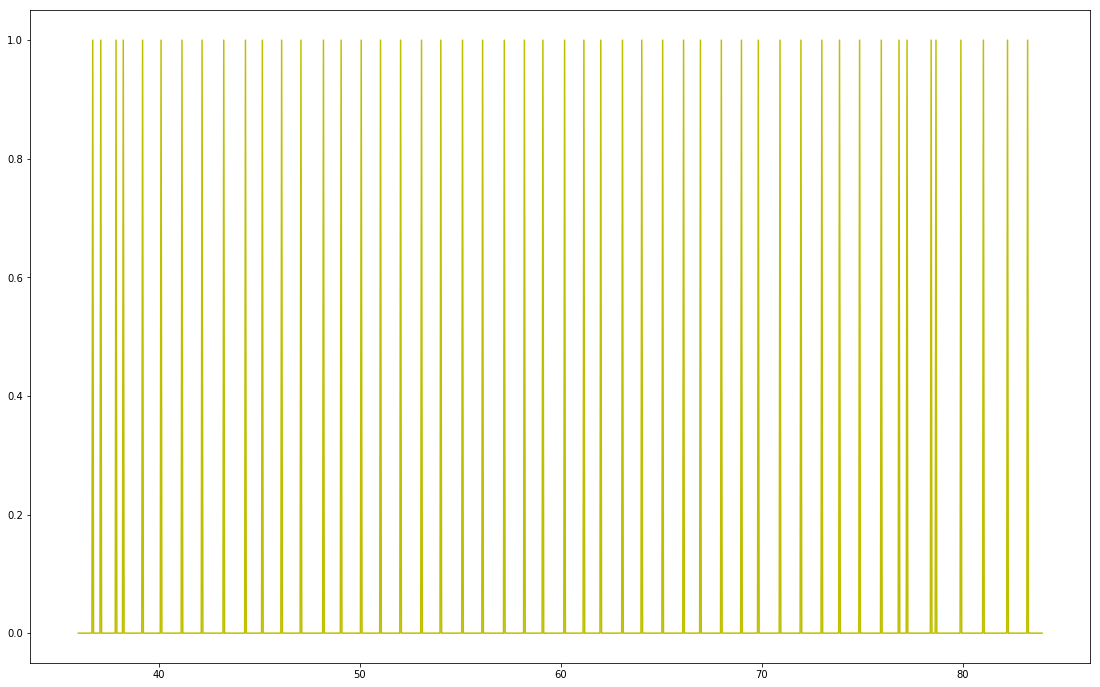

In [104]:
data_x = np.array(dataset.iloc[900:2100, 0:39])
print(data_x.shape)
print(data_x)

data_y = np.array(dataset.iloc[900:2100, 40:41])
data_y = np.array(data_y)
for dy in data_y:
    
print(data_y.shape)
print(data_y)

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

plt.figure(figsize=(19, 12))
#plt.plot([i for i in range(0,1000)], [i[0] for i in rand_x], 'b')
plt.plot([i[0] for i in data_x], [i[0] for i in data_y], 'y')
plt.show()

In [106]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
#batch_size = 128
display_step = 200

# Network Parameters
num_input = 39 # MNIST data input (img shape: 28*28)
timesteps = 20 # timesteps
num_hidden = 50 # hidden layer num of features
num_output= 2

In [107]:
train_x,train_y=[],[] 
for i in range(len(data_x)-timesteps):
    x=data_x[i:i+timesteps]
    y=data_y[i+timesteps]
    train_x.append(x)
    train_y.append(y)

print(len(train_x))
print(len(train_y))

1180
1180


In [76]:
train_y[0][0]

1

In [105]:
import tensorflow as tf
from tensorflow.contrib import rnn

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    # tf Graph input
    X = tf.placeholder("float", [None, timesteps, num_input])
    Y = tf.placeholder("float", [None, num_output])
    
    # Define weights
    weights = {
        'out': tf.Variable(tf.random_normal([num_hidden, num_output]))
    }
    biases = {
        'out': tf.Variable(tf.random_normal([num_output]))
        #'out':tf.Variable(tf.zeros([1]))
    }
    
    def RNN(x, weights, biases):
        # Prepare data shape to match `rnn` function requirements
        # Current data input shape: (batch_size, timesteps, n_input)
        # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

        # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
        x = tf.unstack(x, timesteps, 1)

        # Define a lstm cell with tensorflow
        lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

        # Get lstm cell output
        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

        # Linear activation, using rnn inner loop last output
        return tf.matmul(outputs[-1], weights['out']) + biases['out']
    
    logits = RNN(X, weights, biases)
    predicts = tf.nn.softmax(logits=logits, dim=-1)
    print logits.shape
    print predicts.shape
    
    #loss = tf.reduce_mean(tf.squared_difference(logits, Y))
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    #loss = tf.reduce_mean(-predicts[0]*math.log(predicts[0]) - 100*predicts[1]*math.log(predicts[1]))
    #tf.square(tf.sub(y,y_)
    loss = tf.reduce_mean(tf.square(tf.sub(logits, Y)))
#     loss = 0;
#     for p in range(0,2202):
#         loss = loss-predicts[p][0]*math.log(predicts[p][0]) - 100*predicts[p][1]*math.log(predicts[p][1])
#     loss = loss/len(predicts.tolist())
    optimizer = tf.train.AdagradOptimizer(learning_rate = 0.001).minimize(loss)

TypeError: inputs must be a sequence

In [87]:
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(training_steps):
        feed_dict = {X: train_x, Y: train_y}
        _, l, predictions = session.run([optimizer, loss, logits],feed_dict = feed_dict)
        if (step % 500 == 0):
            print('Loss at step %d: %f' % (step, l))

Initialized
Loss at step 0: 0.341969
Loss at step 500: 0.036743
Loss at step 1000: 0.035584
Loss at step 1500: 0.035375


KeyboardInterrupt: 

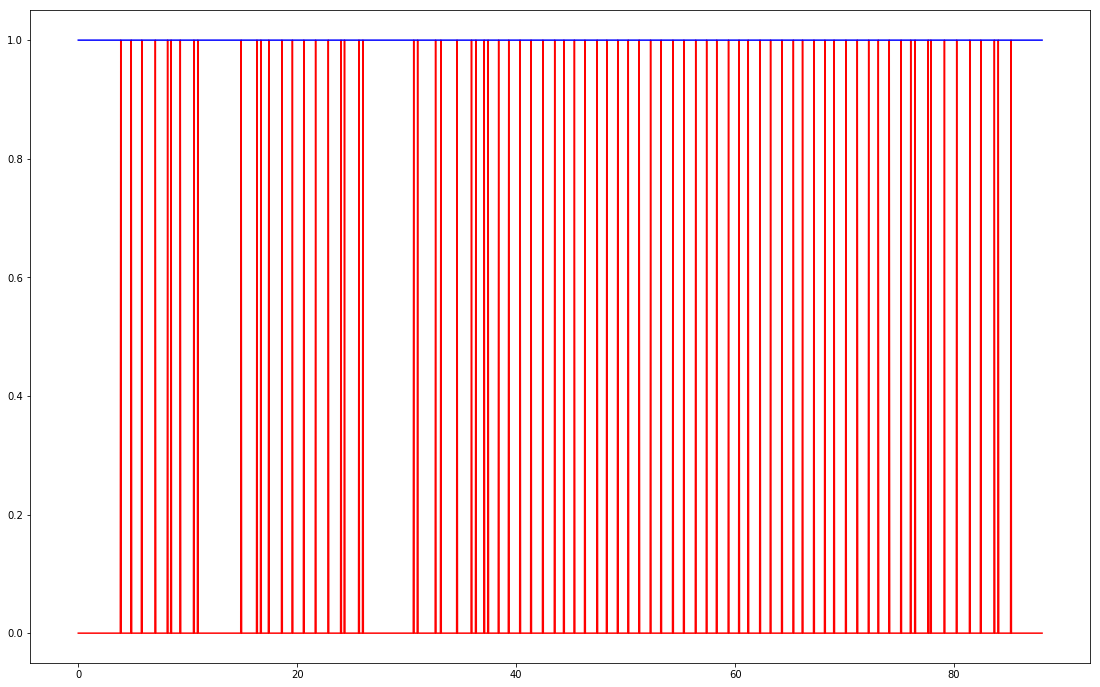

In [95]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

res = []
for p in predictions:
    if(p[0]>p[1]):
        res.append(0);
    else:
        res.append(1);

plt.figure(figsize=(19, 12))
plt.plot([i[0][0] for i in train_x], [i[1] for i in train_y], 'r')
plt.plot([i[0][0] for i in train_x], [i for i in res], 'b')
plt.show()

In [96]:
predictions

array([[-0.97123277,  0.02802587],
       [-0.97307849,  0.02855372],
       [-0.9730438 ,  0.02938962],
       ..., 
       [-0.96233106, -0.03191102],
       [-0.9623338 , -0.03237879],
       [-0.96232545, -0.03182781]], dtype=float32)